## **CNN with CIFAR-10 Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
np.set_printoptions(suppress=True)

In [3]:
print(tf.__version__)

2.7.0


In [4]:
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [5]:
#tf.config.list_physical_devices('GPU')

In [6]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [7]:
#!nvidia-smi

In [8]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [9]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [10]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [11]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

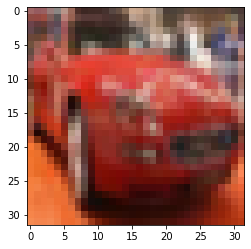

In [12]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [13]:
y_train[5]

array([1], dtype=uint8)

In [14]:
y_train.shape

(50000, 1)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
classes[int(y_train[0])]

'frog'

In [19]:
int(np.random.randint(low=0, high=50000, size=1))

9475

In [20]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[222, 216, 198],
        [230, 223, 211],
        [228, 227, 210],
        ...,
        [215, 212, 200],
        [219, 217, 205],
        [220, 218, 206]],

       [[218, 216, 177],
        [230, 224, 206],
        [216, 212, 208],
        ...,
        [208, 205, 198],
        [212, 209, 201],
        [206, 203, 195]],

       [[208, 211, 137],
        [223, 221, 184],
        [217, 213, 209],
        ...,
        [211, 207, 204],
        [205, 201, 198],
        [201, 197, 194]],

       ...,

       [[216, 208, 203],
        [210, 204, 193],
        [212, 205, 193],
        ...,
        [184, 180, 177],
        [180, 176, 173],
        [180, 176, 173]],

       [[213, 206, 203],
        [211, 205, 197],
        [212, 205, 196],
        ...,
        [179, 176, 173],
        [169, 166, 163],
        [164, 161, 159]],

       [[194, 191, 184],
        [199, 196, 189],
        [212, 207, 198],
        ...,
        [196, 197, 193],
        [195, 195, 194],
        [186, 186, 186]]

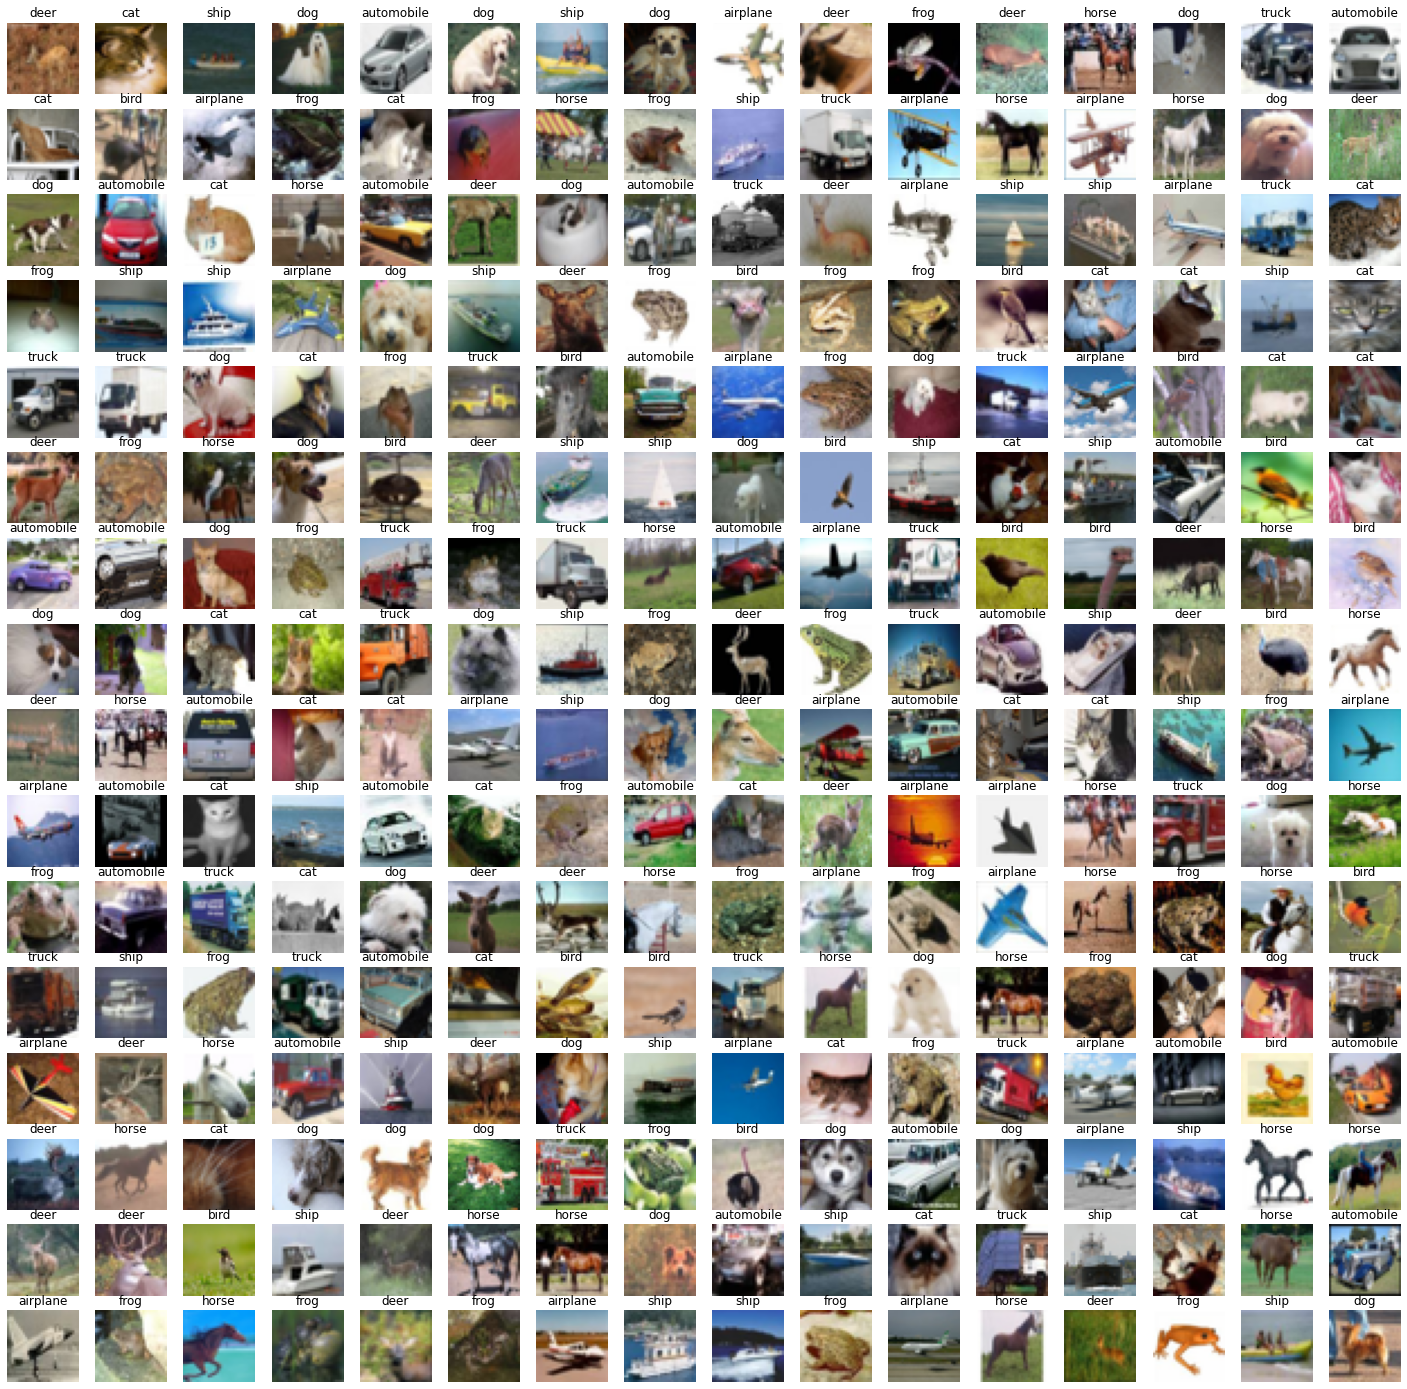

In [21]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

## Data Preprocessing

In [22]:
X_train[5].min()

0

In [23]:
X_train[5].max()

252

In [24]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train[5].min()

0.0

In [26]:
X_train[5].max()

0.9882353

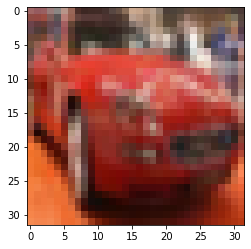

In [27]:
plt.imshow(X_train[5])

In [28]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [29]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [32]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Dropout layer extra info

[External link to the keras documentation about dropout layers. An important read!](https://keras.io/api/layers/regularization_layers/dropout/)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-03-12 12:51:45.997169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 12:51:46.030147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 12:51:46.030310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 12:51:46.031156: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [38]:
model.fit(X_train, Y_train, batch_size=16, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

2022-03-12 12:51:47.058621: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-12 12:51:47.422971: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50


2022-03-12 12:51:48.365927: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


3125/3125 [==============================] - 12s 3ms/step - loss: 1.3696 - accuracy: 0.5031 - val_loss: 1.0079 - val_accuracy: 0.6451
Epoch 2/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9343 - accuracy: 0.6720 - val_loss: 0.8897 - val_accuracy: 0.6941
Epoch 3/50
3125/3125 [==============================] - 11s 3ms/step - loss: 0.7834 - accuracy: 0.7264 - val_loss: 0.8309 - val_accuracy: 0.7156
Epoch 4/50
3125/3125 [==============================] - 11s 3ms/step - loss: 0.6847 - accuracy: 0.7624 - val_loss: 0.8284 - val_accuracy: 0.7130
Epoch 5/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6037 - accuracy: 0.7867 - val_loss: 0.8191 - val_accuracy: 0.7236
Epoch 6/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5316 - accuracy: 0.8115 - val_loss: 0.8420 - val_accuracy: 0.7278
Epoch 7/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4704 - accuracy: 0.8320 - val_loss: 0.8505 - val_accuracy: 0.7

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.history.history

{'loss': [1.3695745468139648,
  0.9342653751373291,
  0.7833653688430786,
  0.6847249269485474,
  0.6037255525588989,
  0.5315613150596619,
  0.4704127311706543,
  0.4140453040599823,
  0.3673063814640045,
  0.3288878798484802],
 'accuracy': [0.5030999779701233,
  0.671999990940094,
  0.7264400124549866,
  0.7624199986457825,
  0.7867400050163269,
  0.811519980430603,
  0.8320199847221375,
  0.8522400259971619,
  0.8684999942779541,
  0.8820000290870667],
 'val_loss': [1.0078784227371216,
  0.889656126499176,
  0.8308501839637756,
  0.8283738493919373,
  0.8191262483596802,
  0.8420056700706482,
  0.8505163192749023,
  0.9810013771057129,
  1.006696343421936,
  1.0438898801803589],
 'val_accuracy': [0.6450999975204468,
  0.694100022315979,
  0.7156000137329102,
  0.7129999995231628,
  0.7235999703407288,
  0.7278000116348267,
  0.7319999933242798,
  0.7156000137329102,
  0.7179999947547913,
  0.7117000222206116]}

In [41]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.369575,0.50310,1.007878,0.6451
1,0.934265,0.67200,0.889656,0.6941
2,0.783365,0.72644,0.830850,0.7156
3,0.684725,0.76242,0.828374,0.7130
4,0.603726,0.78674,0.819126,0.7236


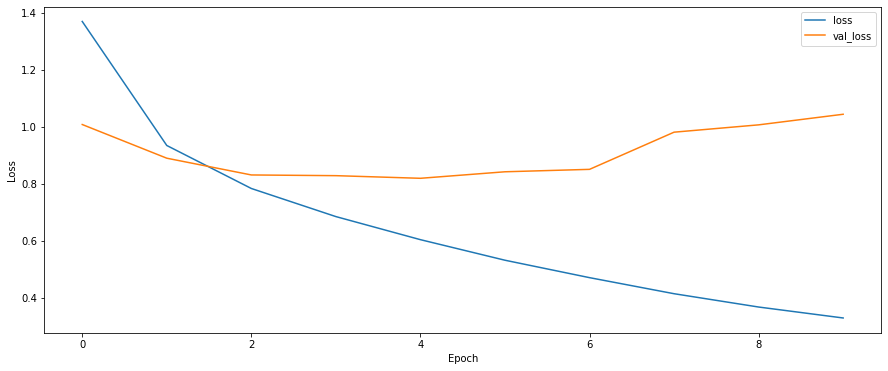

In [42]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

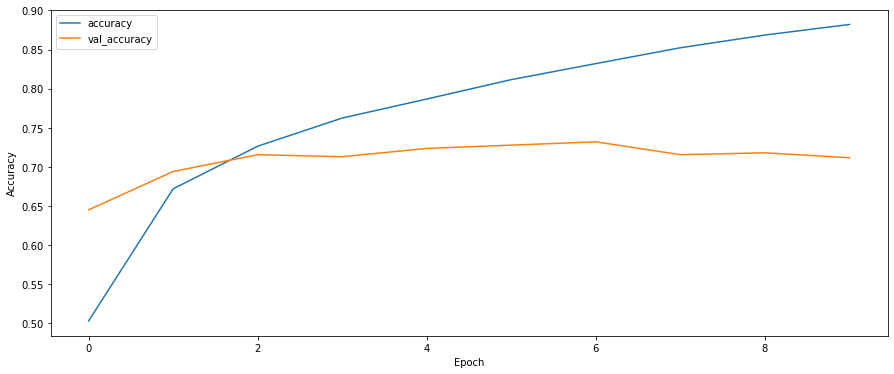

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [44]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 1s 3ms/step - loss: 1.0439 - accuracy: 0.7117
[1.0438891649246216, 0.7117000222206116]


In [45]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [46]:
preds = model.predict(X_test)


In [47]:
predictions = np.argmax(preds, axis=1)

In [48]:
predictions

array([3, 8, 8, ..., 5, 7, 7])

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.85      0.86      0.85      1000
           2       0.53      0.69      0.60      1000
           3       0.50      0.54      0.52      1000
           4       0.67      0.63      0.65      1000
           5       0.64      0.56      0.59      1000
           6       0.85      0.70      0.77      1000
           7       0.79      0.74      0.76      1000
           8       0.86      0.81      0.83      1000
           9       0.80      0.82      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [50]:
print(confusion_matrix(y_test, predictions))

[[776  15  78  21  10   3   6   5  51  35]
 [ 21 860   9   5   2   5   1   3  20  74]
 [ 61   5 685  56  75  41  23  31   8  15]
 [ 34  11 118 536  59 143  36  33   8  22]
 [ 30   4 110  77 629  37  32  64  11   6]
 [ 15   6  90 230  35 557  13  44   4   6]
 [ 11   4 110  71  54  25 705   8   4   8]
 [ 15   4  53  48  65  51   2 736   5  21]
 [ 69  36  31  10   4   8   5   3 813  21]
 [ 41  68  12  10   6   5   4   9  25 820]]


In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0438891649246216
Test accuracy: 0.7117000222206116


In [52]:
my_image = X_test[44]

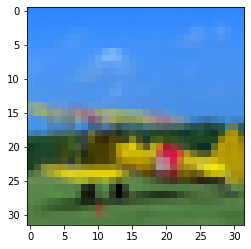

In [53]:
plt.imshow(my_image)

In [54]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [55]:
image_prediction

array([[0.99869055, 0.00000782, 0.00016551, 0.        , 0.00001908,
        0.00000002, 0.        , 0.        , 0.00019585, 0.00092122]],
      dtype=float32)

In [56]:
np.argmax(image_prediction, axis=1)

array([0])

In [57]:
result=np.argmax(image_prediction, axis=1)

In [58]:
result

array([0])

In [59]:
classes[int(result)]

'airplane'

In [60]:
#model.save("cnn-1.h5")

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [62]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [64]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-12 12:54:14.106758: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-12 12:54:14.609328: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3630 - accuracy: 0.5086 - val_loss: 1.0684 - val_accuracy: 0.6297
Epoch 2/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9684 - accuracy: 0.6581 - val_loss: 0.8955 - val_accuracy: 0.6940
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8229 - accuracy: 0.7126 - val_loss: 0.7876 - val_accuracy: 0.7338
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7388 - accuracy: 0.7394 - val_loss: 0.7278 - val_accuracy: 0.7520
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6693 - accuracy: 0.7650 - val_loss: 0.7364 - val_accuracy: 0.7521
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6125 - accuracy: 0.7831 - val_loss: 0.6914 - val_accuracy: 0.7640
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5666 - accuracy: 0.8011 - val_loss: 0.7007 -

In [65]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.818591833114624
Test accuracy: 0.7684999704360962


In [66]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.89      0.88      0.89      1000
           2       0.72      0.65      0.68      1000
           3       0.57      0.59      0.58      1000
           4       0.72      0.77      0.74      1000
           5       0.61      0.67      0.64      1000
           6       0.81      0.83      0.82      1000
           7       0.83      0.80      0.81      1000
           8       0.88      0.85      0.87      1000
           9       0.89      0.83      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [68]:
print(confusion_matrix(y_test, predictions))

[[816  12  49  21  19  11   8  10  37  17]
 [ 13 883   2  13   5   5   8   0  19  52]
 [ 55   1 651  49  89  64  57  22   7   5]
 [ 15   6  55 594  52 179  51  35   6   7]
 [ 11   0  39  59 765  52  30  35   6   3]
 [ 10   4  37 167  42 666  27  41   4   2]
 [  1   1  30  74  33  21 829   5   4   2]
 [ 14   0  22  39  51  68   4 799   1   2]
 [ 58  22  16  11   6  11   6   4 855  11]
 [ 30  58   8  10   4   9   8  17  29 827]]


<AxesSubplot:>

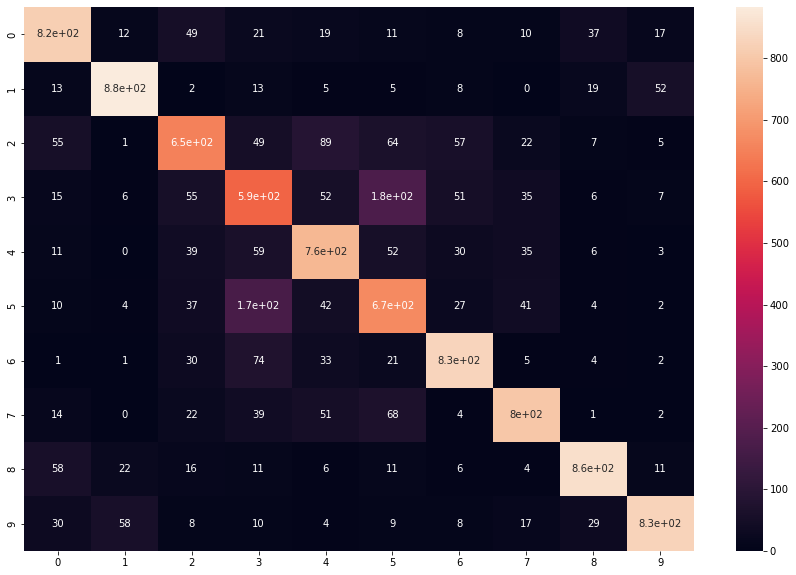

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [70]:
from tensorflow.keras.layers import BatchNormalization

In [71]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [72]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation=None))
model.add(BatchNormalization())
tf.keras.layers.activation('relu')
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-12 12:58:30.148383: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 19s 11ms/step - loss: 1.5126 - accuracy: 0.4842 - val_loss: 1.0309 - val_accuracy: 0.6418
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9098 - accuracy: 0.6889 - val_loss: 0.8025 - val_accuracy: 0.7253
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7250 - accuracy: 0.7568 - val_loss: 0.6908 - val_accuracy: 0.7633
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6012 - accuracy: 0.7982 - val_loss: 0.6384 - val_accuracy: 0.7866
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5014 - accuracy: 0.8349 - val_loss: 0.6733 - val_accuracy: 0.7760
Epoch 6/100
1563/1563 [==============================] - 18s 12ms/step - loss: 0.4094 - accuracy: 0.8651 - val_loss: 0.5978 - val_accuracy: 0.8029
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3312 - accuracy: 0.8907 - val_loss: 0

In [75]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7231375575065613
Test accuracy: 0.8245000243186951


In [76]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.92      0.92      0.92      1000
           2       0.78      0.71      0.74      1000
           3       0.69      0.66      0.67      1000
           4       0.81      0.80      0.81      1000
           5       0.78      0.70      0.74      1000
           6       0.79      0.91      0.85      1000
           7       0.84      0.89      0.87      1000
           8       0.92      0.88      0.90      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

